<a href="https://colab.research.google.com/github/kshitij-bhardwaj/Voice-Morph-Companion/blob/kshitij-bhardwaj/Week%203/CNN%20Assignment/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1. Load the Cifar-100 dataset
1. Load the cifar 100 dataset. Use the 'coarse' labels.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data



In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')

2. Check if there are 20 labels in y_train using np.unique().

In [5]:
unique_labels, counts = np.unique(y_train, return_counts=True)
num_coarse_labels = len(unique_labels)

print(f"Number of unique coarse labels in training data: {num_coarse_labels}")

Number of unique coarse labels in training data: 20


3. More information about the dataset could be found here : https://www.cs.toronto.edu/~kriz/cifar.html . Plot the first 25 images from both the train and test data.

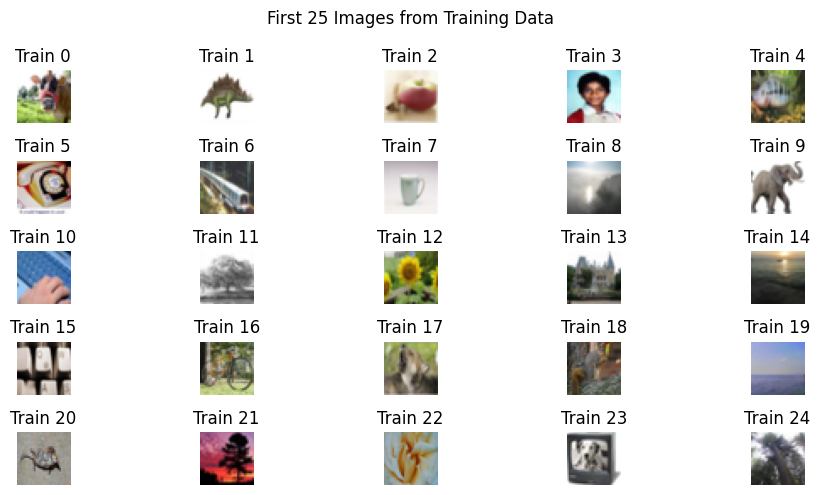

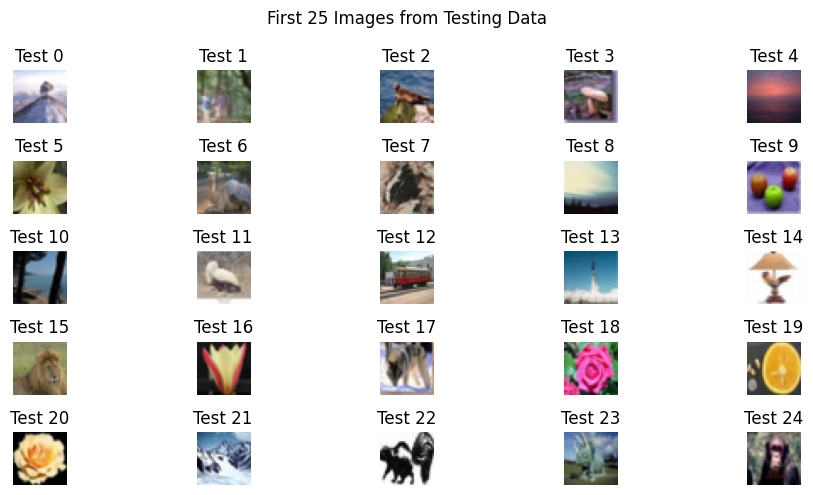

In [7]:
num_images_to_plot = 25

# Plot first 25 images from training data
plt.figure(figsize=(10, 5))
for i in range(num_images_to_plot):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Train {i}")
    plt.axis('off')
plt.suptitle("First 25 Images from Training Data")
plt.tight_layout()
plt.show()

# Plot first 25 images from testing data
plt.figure(figsize=(10, 5))
for i in range(num_images_to_plot):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Test {i}")
    plt.axis('off')
plt.suptitle("First 25 Images from Testing Data")
plt.tight_layout()
plt.show()

4. Normalize the data

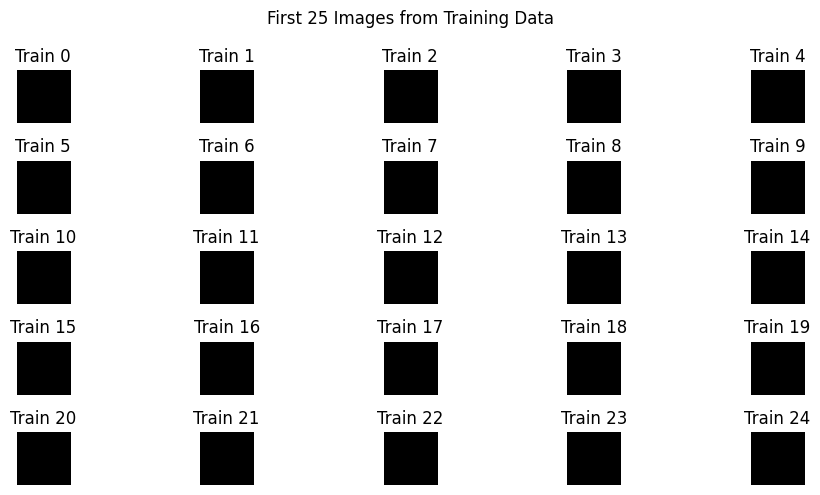

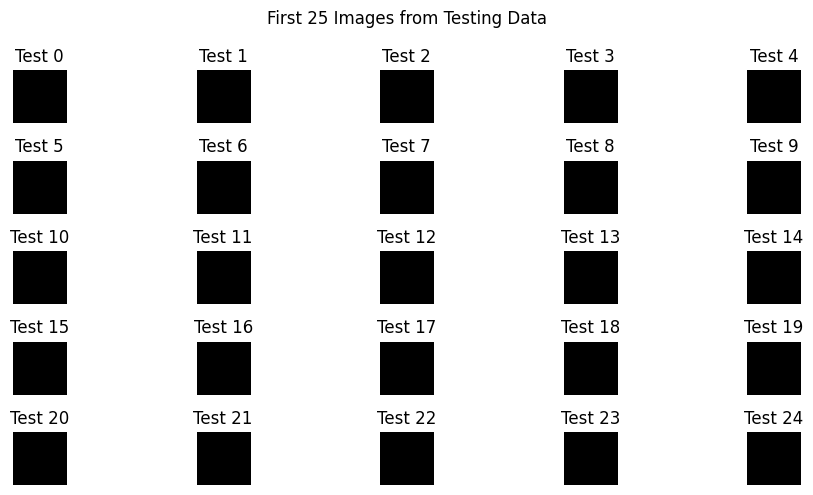

In [10]:
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

# Update the data variables with normalized versions
x_train = x_train_norm
x_test = x_test_norm

num_images_to_plot = 25

# Plot first 25 images from training data
plt.figure(figsize=(10, 5))
for i in range(num_images_to_plot):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Train {i}")
    plt.axis('off')
plt.suptitle("First 25 Images from Training Data")
plt.tight_layout()
plt.show()

# Plot first 25 images from testing data
plt.figure(figsize=(10, 5))
for i in range(num_images_to_plot):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Test {i}")
    plt.axis('off')
plt.suptitle("First 25 Images from Testing Data")
plt.tight_layout()
plt.show()

It can be seen that the model couldn't achieve a good accuracy. We need to use better models for this task.

# Question 2 : Implement VGGNet - Part 1

Check this website : https://paperswithcode.com/sota/image-classification-on-cifar-100 . It contains information about the best performing models.

We can check the VGGNet-16 model. It consists of 16 layers with weights and some maxpooling layers. The architecture could be in the internet (even in the slides).

VGGNet works on images of size (224,224,3). However, we can implement it on (32,32,3). We will see both the approaches. First let's build VGGNet and train it on original image. Then, we will reshape our images from (32,32,3) to (224,224,3) and train VGGNet on them.

The layers are :

1. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation.
2. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation.
3. MaxPooling . kernel = 2x2. strides = (2,2).
4. Conv layer : 128 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
5. Conv layer : 128 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
6. MaxPooling . kernel = 2x2. strides = (2,2).
7. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
8. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
9. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
10. MaxPooling . kernel = 2x2. strides = (2,2).
11. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
12. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
13. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
14. MaxPooling . kernel = 2x2. strides = (2,2).
15. Flatten Layer.
16. Dense layer of 4096 neurons.
17. Dense layer of 1000 neurons.
18. Dense layer of 20 neurons.


I have omitted the last block of three conv layers of 512 kernels because the output sizes reduces to (1,1,512). You may include it and see.

The order of convolution, batch normalization and relu activation matters. If you do relu activation before normalization, it may happen that your loss fails to backpropagate.

In [20]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
def vgg_like_model(input_shape=(32, 32, 3), num_classes=100):
  """
  VGG-like model for CIFAR-100 classification.

  Args:
      input_shape: Input image shape (default: (32, 32, 3)).
      num_classes: Number of output classes (default: 100 for CIFAR-100).

  Returns:
      A compiled Keras model.
  """

  # Input layer
  inputs = keras.Input(shape=input_shape)

  # Block 1
  x = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same')(inputs)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

  # Block 2
  x = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

  # Block 3
  x = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

  # Block 4 (optional)
  x = Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

  # Flatten layer
  x = Flatten()(x)

  # Fully-connected layers
  x = Dense(4096, activation='relu')(x)
  x = Dense(1000, activation='relu')(x)
  x = Dense(20, activation='relu')(x)
  outputs = Dense(num_classes, activation='softmax')(x)

  # Model
  model = keras.Model(inputs=inputs, outputs=outputs)

  # Compile the model

  return model


Once you are ready with the model, change runtime to GPU and then train the model, else it will take a lot of time to train it on CPU.

Compile the model using SparseCategoricalCrossentropy Loss Function and accuracy metric. Fit it on the train dataset. and evaluate on the test.

In [27]:
# # Define data augmentation (optional, but recommended)
# datagen = ImageDataGenerator(
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True
# )

# # Create training data generator
# train_generator = datagen.flow(x_train, y_train, batch_size=32)


model = vgg_like_model(input_shape=x_train.shape[1:], num_classes=100)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=500)

model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/20
1563/1563 [==============================] - 49s 27ms/step - loss: 3.8638 - accuracy: 0.0490 - val_loss: 3.3905 - val_accuracy: 0.0500
Epoch 2/20
1563/1563 [==============================] - 42s 27ms/step - loss: 3.2307 - accuracy: 0.0480 - val_loss: 3.1309 - val_accuracy: 0.0500
Epoch 3/20
1563/1563 [==============================] - 42s 27ms/step - loss: 3.0875 - accuracy: 0.0485 - val_loss: 3.0561 - val_accuracy: 0.0500
Epoch 4/20
1563/1563 [==============================] - 42s 27ms/step - loss: 3.0392 - accuracy: 0.0473 - val_loss: 3.0257 - val_accuracy: 0.0500
Epoch 5/20
1563/1563 [==============================] - 42s 27ms/step - loss: 3.0179 - accuracy: 0.0484 - val_loss: 3.0112 - val_accuracy: 0.0500
Epoch 6/20
1563/1563 [==============================] - 42s 27ms/step - loss: 3.0074 - accuracy: 0.0481 - val_loss: 3.0038 - val_accuracy: 0.0500
Epoch 7/20
1563/1563 [==============================] - 42s 27ms/step - loss: 3.0020 - accuracy: 0.0490 - val_loss: 3.0000 -